In [1]:
#import
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt
%matplotlib inline

#set figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#normalise
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read file
df = pd.read_csv("BTC-USD.csv")

#print head
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3271,2019-06-30,10769.049805,11207.000000,10006.429688,10591.870117,10591.870117,1225129699
3272,2019-07-01,10591.870117,10927.599609,9678.099609,10844.129883,10844.129883,1239524970
3273,2019-07-02,10844.129883,12009.589844,10841.910156,11981.610352,11981.610352,1313585829
3274,2019-07-03,11981.610352,12055.110352,11067.679688,11075.830078,11075.830078,817695378
3275,2019-07-05,11156.589844,11346.320313,10787.940430,11235.150391,11235.150391,343360128


/Users/andrew/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


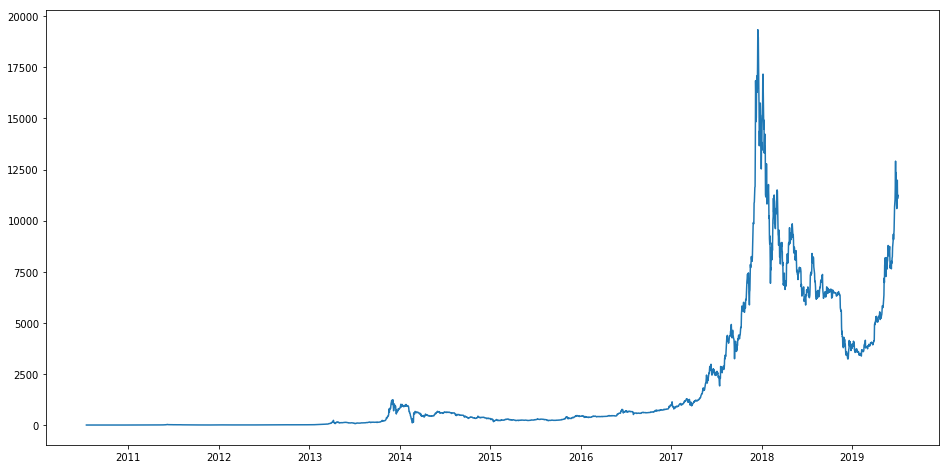

In [2]:
#set date as index
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label="Close price history")

In [3]:
#create dataframe with data and target variable
data = df.sort_index(ascending=True, axis = 0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Closing Price (USD)'][i]
    
#split into train and validation, preserving time component
train = new_data[:1700]
valid = new_data[1700:]

new_data.shape, train.shape, valid.shape

KeyError: 'Closing Price (USD)'

In [ ]:
#predict
preds = []
for i in range(0, 391):
    a = train['Close'][len(train) - 391 + i].sum() + sum(preds)
    b = a/391
    preds.append(b)

## Markdown

In [ ]:
#calculate 
output = np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds), 2)))
output

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [ ]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
#create features
from fastai.tabular  import  add_datepart
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp    

In [ ]:
#split into train and validation
train = new_data[:1700]
valid = new_data[1700:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

In [ ]:
 #plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[1700:].index
train.index = new_data[:1700].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [ ]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [ ]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

In [ ]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])


In [4]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
#import
import pandas as pd
import numpy as np

#plot
import matplotlib.pyplot as plt
%matplotlib inline

#set figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#normalise
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read file
df = pd.read_csv("BTC-USD.csv")

#print head
df.tail()

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:1700,:]
valid = dataset[1700:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Using TensorFlow backend.
/Users/andrew/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
W0705 12:26:13.655408 4451485120 deprecation_wrapper.py:119] From /Users/andrew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0705 12:26:13.673882 4451485120 deprecation_wrapper.py:119] From /Users/andrew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0705 12:26:13.676658 4451485120 deprecation_wrapper.py:119] From /Users/andrew/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0705 12:26

Epoch 1/1
 - 128s - loss: 1.9457e-05


In [5]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

922.0360340286093

/Users/andrew/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


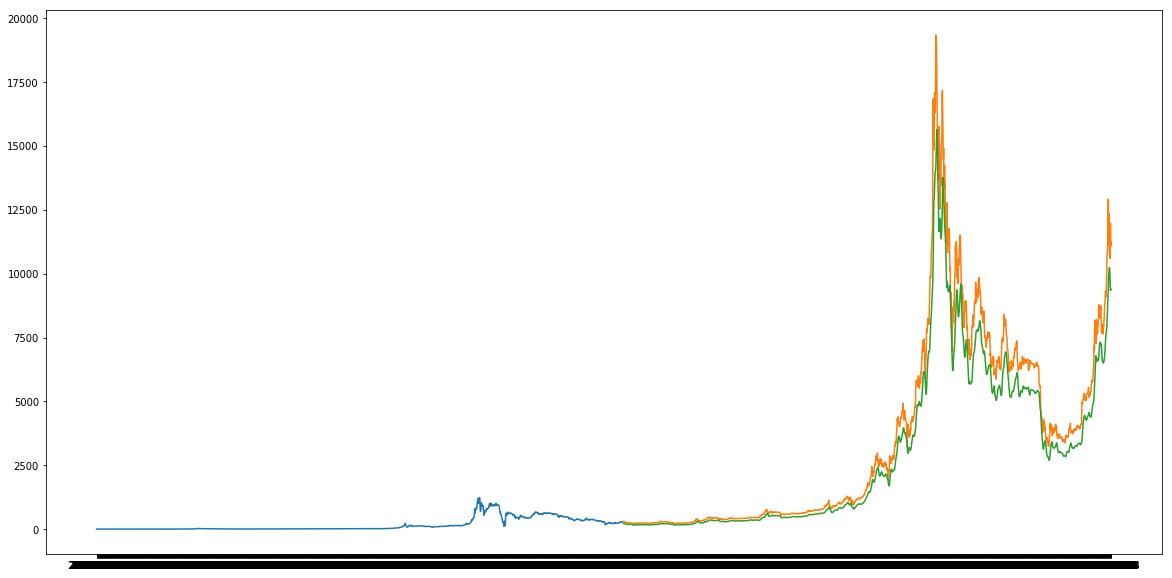

In [6]:
train = new_data[:1700]
valid = new_data[1700:]


valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

NameError: name 'x_range_original' is not defined

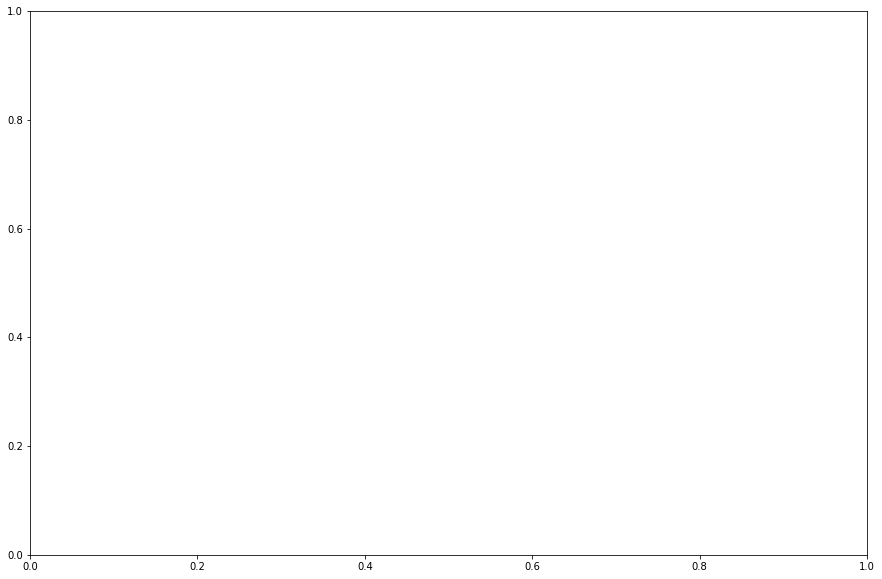

In [7]:
fig = plt.figure(figsize = (15, 10))
ax = plt.subplot(111)
ax.plot(x_range_original, df.iloc[:, -1], label = 'true Volume')
ax.plot(x_range_future, anchor(df_log[:, -1], 0.5), label = 'predict Volume')
box = ax.get_position()
ax.set_position(
    [box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9]
)
ax.legend(
    loc = 'upper center',
    bbox_to_anchor = (0.5, -0.05),
    fancybox = True,
    shadow = True,
    ncol = 5,
)
plt.xticks(x_range_future[::30], date_ori[::30])
plt.title('overlap market volume')
plt.show()